## Introductory Machine Learning: Assignment 6

**Deadline:**

Assignment 6 is due Thursday, November 30 at 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on [Canvas](https://canvas.yale.edu).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on [Canvas](https://canvas.yale.edu).  You can also post questions or start discussions on [Ed Discussion](https://edstem.org/us/courses/9209/discussion/). The problems are broken up into steps that should help you to make steady progress.

**Submission:**

Submit your assignment as a .pdf on Gradescope, and as a .ipynb on Canvas. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as", select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

**Topics**
1. Bayesian inference
2. Topic models

The first two problems test some of the basics of Bayesian inference. The third problem has you building topic models and using them to fit some linear regressions. The fourth problem asks you to build topic models on the UN data.

Note: The assignment looks longer than it really is. We step you through most of the code that you need. But it's still on the long side. Although the assignment is due in three weeks, we encourage you to start early!

### Problem 1: Let the good times roll (10 points)

Consider the scenario of rolling a 4-sided die with the numbers $1$, $2$, $3$, and $4$ on its faces. Suppose we roll this die many times and get a collection of $n$ outcomes represented by $X_{1}, X_{2}, ..., X_{n}$. Here each $X_{i}$ is a random variable that independently follows a Multinomial$(p_{1}, p_{2}, p_{3}, p_{4})$ model (where $p_{1}+p_{2}+p_{3}+p_{4}=1$).

This die may or may not be fair. If it were fair then $p_{1}=p_{2}=p_{3}=p_{4}=0.25$, but since we are uncertain about these parameters we treat them as random and the problem requires Bayesian inference.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Part (a)

For (a) we will assume that $(p_{1}, p_{2}, p_{3}, p_{4})$ follows a Dirichlet$(\alpha_{1}, \alpha_{2}, \alpha_{3}, \alpha_{4})$ distribution where $\alpha_{1}, \alpha_{2}, \alpha_{3}, \alpha_{4}$ are unknown, positive-valued parameters. Suppose we have a prior belief that the four-sided die is close to being fair. This is represented by $\alpha_{1}= \alpha_{2}= \alpha_{3}= \alpha_{4} = c$ for some positive real number $c$.

For $c = 0.1, 1, 10, 30, 60, 100, 1000$ draw $1000$ samples of $(p_{1}, p_{2}, p_{3}, p_{4})$ from a Dirichlet$(c,c,c,c)$ distribution. For this sample, calculate the mean and standard deviation of $p_{1}$. Create a plot of $log(c)$ vs. the mean and another plot of $log(c)$ vs. the standard deviation. Describe in your own words what happens to these two quantities as $c$ increases.

Text(0, 0.5, 'std of p1')

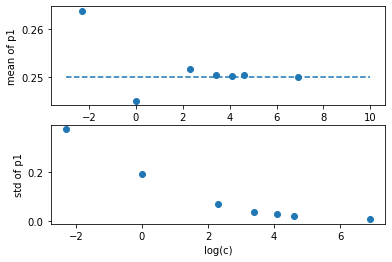

In [68]:
p1_mean = []
p1_std = []
for c in [0.1, 1, 10, 30, 60, 100, 1000]:
    p1_mean.append(np.mean((np.random.dirichlet((c, c, c, c), 1000)), axis=0)[0])
    p1_std.append(np.std((np.random.dirichlet((c, c, c, c), 1000)), axis=0)[0])

plt.subplot(2, 1, 1)
plt.scatter(np.log([0.1, 1, 10, 30, 60, 100, 1000]), p1_mean)
plt.xlabel("log(c)")
plt.ylabel("mean of p1")
plt.hlines(0.25, -3, 10, linestyles="dashed")
plt.subplot(2, 1, 2)
plt.scatter(np.log([0.1, 1, 10, 30, 60, 100, 1000]), p1_std)
plt.xlabel("log(c)")
plt.ylabel("std of p1")

As c increases, the mean of p1 is gradually converging to 0.25, and the std of p1 is monotonically decreasing.

#### Part (b)

The following cell loads 10,000 rolls for the four-sided die. $[1,0,0,0]$ indicates that the die landed on face $1$, $[0,1,0,0]$ indicates that the die landed on face $2$, and so on. For $c = 0.1, 1, 10, 30, 60, 100, 1000$, use Dirichlet$(c,c,c,c)$ as the prior distribution for $(p_{1}, p_{2}, p_{3}, p_{4})$. *Using only the first $100$ rolls of the die*, calculate the mean of the posterior distribution. What do you notice about the posterior mean as $c$ increases?

Give code to compute the answer and plot the results. Also, give a markdown cell with a mathematical expression for the solution.

Hint: The mean of the Dirichlet$(\alpha_{1}, \alpha_{2}, \alpha_{3}, \alpha_{4})$ is $\left( \dfrac{\alpha_{1}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}}, \dfrac{\alpha_{2}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}}, \dfrac{\alpha_{3}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}}, \dfrac{\alpha_{4}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}} \right)$

In [77]:
X = pd.read_pickle('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn6/X.pkl')
X

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=int64)

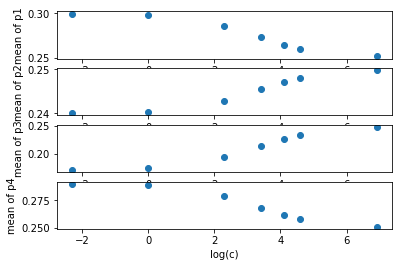

In [100]:
post_dist = [[], [], [], []]
for c in [0.1, 1, 10, 30, 60, 100, 1000]:
    for i in range(4):
        post_dist[i].append(([c] * 4 + np.sum(X[0:100], axis=0))[i] / (100 + 4*c))

for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.scatter(np.log([0.1, 1, 10, 30, 60, 100, 1000]), post_dist[i])
    plt.xlabel("log(c)")
    plt.ylabel("mean of p"+str(i+1))

$E(p_{i}) = c + x_{i} / (4c + 100)$, for $i=1, 2, 3, 4$. Hence, with $c$ increasing, the mean of $p_{i}$ converges to 0.25.

#### Part (c)

Now repeat the process in Part (b), but with sample sizes $N = 100, 200, 300, ..., 9900, 10000$. For each value of $c$, create a plot that shows the trend of the posterior mean for $p_{1}$ as a function of sample size $N$. Create a similar plot for $p_{2}$, $p_{3}$, and $p_{4}$. Explain what these plots illustrate about the choice of prior and the sample size. What do you estimate were the true parameters used to generate this dataset?

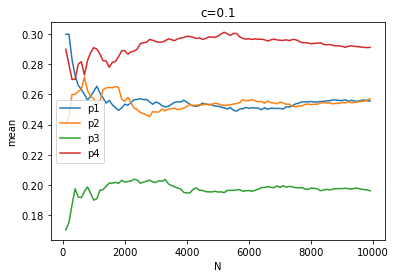

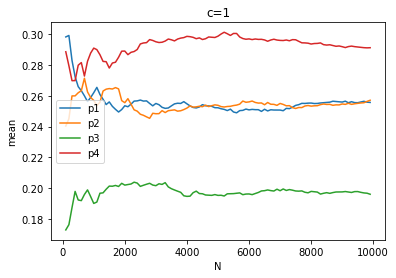

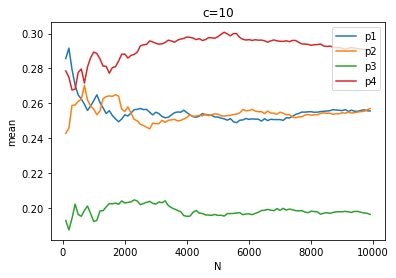

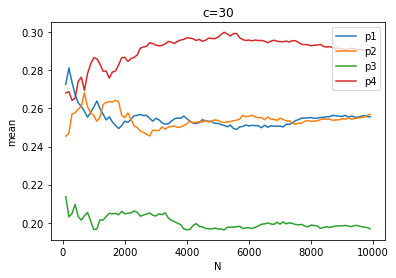

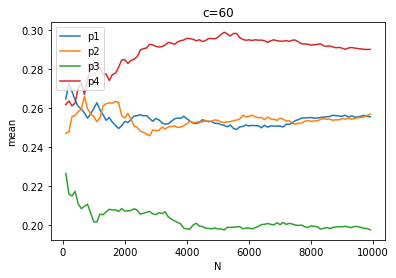

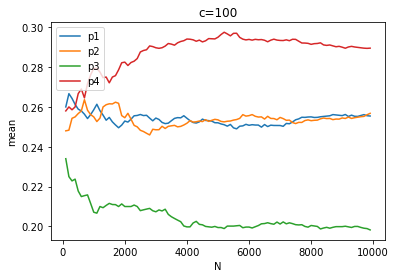

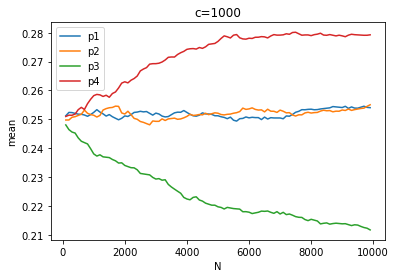

In [128]:
for c in [0.1, 1, 10, 30, 60, 100, 1000]:
    post_dist = [[], [], [], []]
    for N in range(100, 10000, 100):
        for i in range(4):
            post_dist[i].append(([c] * 4 + np.sum(X[0:N], axis=0))[i] / (N + 4*c))
    fig = plt.figure()
    plt.title("c=" + str(c))
    for i in range(4):        
        plt.plot(range(100, 10000, 100), post_dist[i], label="p"+str(i+1))
        plt.legend()
        plt.xlabel("N")
        plt.ylabel("mean")

In [132]:
X.sum(axis=0)

array([2555, 2574, 1953, 2918], dtype=int64)

The larger $c$ is, with data sample size $N$ increases, the influence of likelihood appears slower on the posterior estimate. Also, the larger $c$ is, the converage curves are more smooth.

The real parameters are likely to be [0.25, 0.25, 0.2, 0.3].

### Problem 2: Toy Story (12 points)

Gibbs sampling is one of the commonly used approach to approximate the inference for Latent Dirichlet Allocation model. In this problem, we will use the toy example from class.

<img src="https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn6/diagram.png" width="500" align="center">

Assume that there are 3 documents and 15 words in the corpus. We would like to build a topic model with 3 topics. The proportions parameter is $\alpha$ and the topic parameter is $\eta$. The table below shows an assignment of topics to words in the toy corpus at one stage of the Gibbs sampling algorithm. 

<img src="https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn6/words.png" width="500" align="center">

Using only these assignment id $Z$ for each word, the following problems ask you 
to calculate the posterior topic proportions for each document, and word probabilities 
for one word in each of the three topics. To answer these questions you only need
to use the basic properties of the Dirichlet distribution as a prior for 
a multinomial, as presented in class (and in the notes on Bayesian inference).


#### Problem 2.1: Per-document topic proportions

Given the $Z$ values in the table, what are the posterior distributions of $\theta_{d}$ for documents $D_{1}$, $D_{2}$ and $D_{3}$ from left to right. Assume the prior over $\theta$ is 
$\mbox{Dirichlet}(\alpha, \alpha, \alpha)$.

$\theta_{1}$ ~ $\mbox{Dirichlet}(\alpha+3, \alpha, \alpha+2)$

$\theta_{2}$ ~ $\mbox{Dirichlet}(\alpha+2, \alpha+3, \alpha)$

$\theta_{3}$ ~ $\mbox{Dirichlet}(\alpha, \alpha+3, \alpha+2)$

#### Problem 2.2: Topics

Here are the 15 words in our corpus:

addiction, brother, baseball, catcher, daughter, divorce, drug, hit, inning, illegal, meth, mother, swing, son, steroids

What is the posterior mean for the probability $p(\mbox{addiction} | \mbox{topic 1})$? 
Assume that the prior distribution over the topics is $\mbox{Dirichlet}(\eta,...\eta)$.

$p(\mbox{addiction} | \mbox{topic 1}) = \eta / (15\eta + 5)$

What is the posterior mean of the probability $p(\mbox{baseball}| \mbox{topic 2})$?

$p(\mbox{baseball}| \mbox{topic 2}) = (2+\eta) / (15\eta + 6)$

What is the posterior mean of the probability $p(\mbox{divorce} | \mbox{topic 3})$?

$p(\mbox{divorce} | \mbox{topic 3}) = (1+\eta) / (15\eta + 4)$

## Problem 3: Read before you buy! (30 points)

![zillow](https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn6/zillow.png)

### Overview of the problem

Here we have a dataset of single family houses sold in Connecticut near the beginning of 2021, collected from [Zillow](https://www.zillow.com/homes/connecticut_rb/). You will build linear models of the price for which each house sold, based on its characteristics given in the real estate listing. Such characteristics include internal square footage, the year it was built, the bedroom count, the bathroom count, and the area of the lot. 

But there is also usually a lengthy description written by the real estate agent. Is there any additional information hidden in this description that would help improve the model of the price? This is the question we focus on in this problem.

Answering such a question is difficult because the description is written in natural language with thousands of different words. Here we use topic models as a dimension reduction technique. Specifically, instead of using thousands of possible words, and how many times they show up in each house description, we reduce the words to the topic proportions $\theta_d$ for each document, obtained by posterior inference. These proportions are combined with the other quantitative variables in a linear model with the logarithm of the house price as the response variable. 

*Important note:* At first glance, this problem looks really long. But this is deceiving. 
After reading in the data, we have you make some plots of the log-transformed variables. 
After that, you just need to run the code that leads up to training a 10-topic topic model, 
and fitting a linear model using the resulting topic proportions. After this, you are asked to compare the results to those obtained with a 3-topic model. To do this, you can simply copy the code used for the 10-topic model. After that, the crux of the problem is to analyze, understand, and describe the results.

Acknowledgment: The data were scraped and the analysis was done by [Parker Holzer](https://parkerholzer.github.io/), as he began his search for a new house for his family after beginning a job as a data scientist. Thanks Parker!


In [1]:
import numpy as np
import pandas as pd
import re
import gensim
from collections import Counter
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

### Read in and clean up the data

In [2]:
ct_homes = pd.read_csv('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn6/ct_zillow.csv')
ct_homes

,AREA,BED,BATH,BUILT,DESCRIPTION,LOTSIZE,PRICE
0,1629.0,2.0,2.0,1889.0,"Welcome home! Charming & well kept, this 2 bed...",0.159986,224000.0
1,1278.0,3.0,2.0,1900.0,This adorable cape has a lot to offer. You st...,0.179981,225000.0
2,1264.0,3.0,2.0,1988.0,This 1264 sqft Colonial with its 3 bedrooms an...,0.089991,224900.0
3,2054.0,3.0,3.0,1960.0,The perfect oversized ranch awaits you at 7 No...,0.569994,370000.0
4,4198.0,5.0,3.0,1972.0,Beautiful Colonial-3020 sqft. living space and...,0.939989,489999.0
...,...,...,...,...,...,...,...
1921,848.0,3.0,2.0,1948.0,This home sets at the beginning of a Cul-de-Sa...,0.189990,429900.0
1922,2400.0,4.0,4.0,2021.0,New home to be built. Amazing unobstructed wat...,0.079981,800000.0
1923,6538.0,7.0,7.0,2002.0,Can you say water views galore? Wake up to the...,0.079981,2700000.0
1924,4480.0,5.0,5.0,1890.0,NEW YEAR! NEW FUTURE! Escape NY to Connect...,0.849998,2550000.0


#### Transform the data

We add columns to `ct_homes` called `logAREA`, `logLOTSIZE`, and `logPRICE` that take the logarithms of the corresponding columns in the original data. 


In [3]:
ct_homes['logAREA'] = np.log(ct_homes['AREA'])
ct_homes['logLOTSIZE'] = np.log(ct_homes['LOTSIZE'])
ct_homes['logPRICE'] = np.log(ct_homes['PRICE'])
ct_homes

,AREA,BED,BATH,BUILT,DESCRIPTION,LOTSIZE,PRICE,logAREA,logLOTSIZE,logPRICE
0,1629.0,2.0,2.0,1889.0,"Welcome home! Charming & well kept, this 2 bed...",0.159986,224000.0,7.395722,-1.832669,12.319401
1,1278.0,3.0,2.0,1900.0,This adorable cape has a lot to offer. You st...,0.179981,225000.0,7.153052,-1.714902,12.323856
2,1264.0,3.0,2.0,1988.0,This 1264 sqft Colonial with its 3 bedrooms an...,0.089991,224900.0,7.142037,-2.408049,12.323411
3,2054.0,3.0,3.0,1960.0,The perfect oversized ranch awaits you at 7 No...,0.569994,370000.0,7.627544,-0.562129,12.821258
4,4198.0,5.0,3.0,1972.0,Beautiful Colonial-3020 sqft. living space and...,0.939989,489999.0,8.342364,-0.061887,13.102159
...,...,...,...,...,...,...,...,...,...,...
1921,848.0,3.0,2.0,1948.0,This home sets at the beginning of a Cul-de-Sa...,0.189990,429900.0,6.742881,-1.660781,12.971308
1922,2400.0,4.0,4.0,2021.0,New home to be built. Amazing unobstructed wat...,0.079981,800000.0,7.783224,-2.525960,13.592367
1923,6538.0,7.0,7.0,2002.0,Can you say water views galore? Wake up to the...,0.079981,2700000.0,8.785387,-2.525960,14.808762
1924,4480.0,5.0,5.0,1890.0,NEW YEAR! NEW FUTURE! Escape NY to Connect...,0.849998,2550000.0,8.407378,-0.162521,14.751604


#### 3.1 Plot the data 

1. Show histograms of each of the log-transformed columns.

1. Our regression models will use these transformed values. Why might it be preferable to use the logarithms rather than the original data? Explain.


(array([  4.,  58., 720., 621., 260., 107.,  45.,  84.,  21.,   6.]),
 array([10.30895266, 11.06034177, 11.81173088, 12.56311999, 13.31450909,
        14.0658982 , 14.81728731, 15.56867642, 16.32006553, 17.07145463,
        17.82284374]),
 <BarContainer object of 10 artists>)

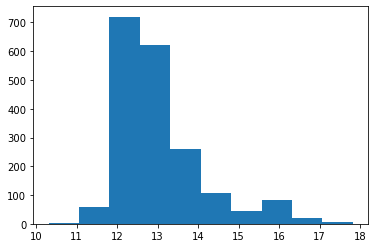

In [4]:
plt.hist(ct_homes['logPRICE'])

Let's look at one of the descriptions as an example.

In [9]:
example = 9
ct_homes["DESCRIPTION"][example]

"One of Ridgefield's most admired homes, custom built with absolutely no expense spared. Stunning Stone and Clapboard New England Colonial with exceptional architectural details throughout, beautifully sited on 1.48 park-like acres. The heart of this home features an updated gourmet Kitchen with Dacor double ovens, Viking cook top and Sub Zero Refrigerator. Gorgeous Taj Mahal Quartz counters and island with Tumbled Limestone back splash. Stylish Living Room with propane fireplace and spacious Dining Room with large Butler's pantry also with quartz and tumbled marble. Handsome Cherry paneled Library and sun filled Family Room with fireplace and built-in cabinets and desk. The Upper level features a large Master Suite with custom marble bath and generous walk-in closet. Three Bedrooms are en suite; and two bedrooms share a lovely Jack n Jill Bathroom. Large, custom Laundry Room and over sized Bonus Room round out the second floor. Other convenient features include front and rear staircas

#### Helper functions

The following two functions will be used to clean up the text a bit and separate into tokens

In [10]:
def cleanup_description(desc):
    if type(desc) == float:
        desc = ""
    words = [re.sub(r'[^a-z]', '', w) for w in desc.lower().split(' ')]
    return ' '.join(words)

def reduce_to_vocabulary(desc, vocab):
    return ' '.join([w for w in cleanup_description(desc).split(' ') if w in vocab])


In [11]:
cleanup_description(ct_homes['DESCRIPTION'][example])

'one of ridgefields most admired homes custom built with absolutely no expense spared stunning stone and clapboard new england colonial with exceptional architectural details throughout beautifully sited on  parklike acres the heart of this home features an updated gourmet kitchen with dacor double ovens viking cook top and sub zero refrigerator gorgeous taj mahal quartz counters and island with tumbled limestone back splash stylish living room with propane fireplace and spacious dining room with large butlers pantry also with quartz and tumbled marble handsome cherry paneled library and sun filled family room with fireplace and builtin cabinets and desk the upper level features a large master suite with custom marble bath and generous walkin closet three bedrooms are en suite and two bedrooms share a lovely jack n jill bathroom large custom laundry room and over sized bonus room round out the second floor other convenient features include front and rear staircases mud room with builti


#### Next we build a vocabulary of words

In [12]:
vocab = Counter()
for dsc in ct_homes['DESCRIPTION']:
    vocab.update(cleanup_description(dsc).split(' '))


In [13]:
print("Number of unique tokens: %d" % len(vocab))

Number of unique tokens: 9738


#### Remove words that are either too common or too rare

In [14]:
vocab = Counter(token for token in vocab.elements() if vocab[token] > 5)
stop_words = [item[0] for item in vocab.most_common(50)]
vocab = Counter(token for token in vocab.elements() if token not in stop_words)
print("Number of unique tokens: %d" % len(vocab))

Number of unique tokens: 2540


#### Build a mapping between unique words and integers

In [15]:
desc = ct_homes['DESCRIPTION'][example]
print('Original description:\n---------------------')
print(desc)

print('\nCleaned up text:\n----------------')
print(cleanup_description(desc))

print('\nReduced to vocabulary:\n----------------------')
print(reduce_to_vocabulary(desc, vocab))

Original description:
---------------------
One of Ridgefield's most admired homes, custom built with absolutely no expense spared. Stunning Stone and Clapboard New England Colonial with exceptional architectural details throughout, beautifully sited on 1.48 park-like acres. The heart of this home features an updated gourmet Kitchen with Dacor double ovens, Viking cook top and Sub Zero Refrigerator. Gorgeous Taj Mahal Quartz counters and island with Tumbled Limestone back splash. Stylish Living Room with propane fireplace and spacious Dining Room with large Butler's pantry also with quartz and tumbled marble. Handsome Cherry paneled Library and sun filled Family Room with fireplace and built-in cabinets and desk. The Upper level features a large Master Suite with custom marble bath and generous walk-in closet. Three Bedrooms are en suite; and two bedrooms share a lovely Jack n Jill Bathroom. Large, custom Laundry Room and over sized Bonus Room round out the second floor. Other convenie

#### Build a mapping between unique words and integers

In [16]:
id2word = {idx: pair[0] for idx, pair in enumerate(vocab.items())}
word2id = {pair[0]: idx for idx, pair in enumerate(vocab.items())}

s = 'nyc'
print("Number of tokens mapped: %d" % len(id2word))
print("Identifier for '%s': %d" % (s,word2id[s]))
print("Word for identifier %d: %s" % (word2id[s], id2word[word2id[s]]))

Number of tokens mapped: 2540
Identifier for 'nyc': 477
Word for identifier 477: nyc


#### Map to word id format

Now, use the format required to build a language model, mapping each word to its id, 

In [17]:
tokens = []
for dsc in ct_homes['DESCRIPTION']:
    clean = reduce_to_vocabulary(cleanup_description(dsc), vocab)
    toks = clean.split(' ')
    tokens.append(toks)

In [18]:
corpus = []
for toks in tokens:
    tkn_count = Counter(toks)
    corpus.append([(word2id[item[0]], item[1]) for item in tkn_count.items()])
    
dsc = ct_homes['DESCRIPTION'][example]
clean = reduce_to_vocabulary(cleanup_description(dsc), vocab)
toks = clean.split(' ')
print("Abstract, tokenized:\n", toks, "\n")
print("Abstract, in corpus format:\n", corpus[10])

Abstract, tokenized:
 ['one', 'most', 'homes', 'custom', 'built', 'absolutely', 'no', 'expense', 'spared', 'stunning', 'stone', 'clapboard', 'england', 'colonial', 'exceptional', 'architectural', 'details', 'throughout', 'beautifully', 'sited', 'parklike', 'acres', 'heart', 'updated', 'gourmet', 'dacor', 'double', 'ovens', 'viking', 'cook', 'top', 'sub', 'refrigerator', 'gorgeous', 'quartz', 'counters', 'island', 'limestone', 'back', 'splash', 'stylish', 'propane', 'spacious', 'butlers', 'pantry', 'also', 'quartz', 'marble', 'handsome', 'cherry', 'paneled', 'library', 'sun', 'filled', 'builtin', 'cabinets', 'desk', 'upper', 'suite', 'custom', 'marble', 'generous', 'walkin', 'closet', 'three', 'are', 'en', 'suite', 'two', 'share', 'lovely', 'jack', 'n', 'jill', 'bathroom', 'custom', 'laundry', 'over', 'sized', 'bonus', 'round', 'out', 'second', 'other', 'convenient', 'include', 'front', 'rear', 'staircases', 'mud', 'builtins', 'pantry', 'utility', 'closets', 'finished', 'lower', 'second

#### Build a Topic Model with 10 topics

Note: Don't worry about the various settings used in the call to `LdaModel`. If you want to read up on these, just check out the documentation. 


In [19]:
%%time
tm = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                     id2word=id2word,
                                     num_topics=10, 
                                     random_state=100,
                                     chunksize=100,
                                     passes=10,
                                     alpha='auto',
                                     per_word_topics=True)

CPU times: user 5.7 s, sys: 25.2 ms, total: 5.73 s
Wall time: 5.74 s


In [20]:
num_topics = 10
num_words = 15
top_words = pd.DataFrame({'word rank': np.arange(1,num_words+1)})
for k in np.arange(num_topics): 
    topic = tm.get_topic_terms(k, num_words)
    words = [id2word[topic[i][0]] for i in np.arange(num_words)]
    probs = [topic[i][1] for i in np.arange(num_words)]
    top_words['topic %d' % k] = words

top_words

,word rank,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,1,create,property,spacious,waterfront,north,will,beach,guests,farm,custom
1,2,architect,it,additional,ft,boasts,roof,water,solar,farmhouse,suite
2,3,premier,own,main,sq,provides,well,sound,panels,antique,island
3,4,indoor,location,perfect,milford,state,have,views,rock,cheshire,by
4,5,shaker,at,bathroom,unique,morning,newer,long,metro,trees,pool
5,6,kayaks,can,two,built,fire,one,miles,salt,better,views
6,7,acreage,opportunity,lower,construction,many,water,post,masterpiece,association,stone
7,8,restored,close,finished,if,garden,been,steps,energy,chestnut,built
8,9,beginning,town,throughout,yale,work,by,directly,amp,original,ceilings
9,10,ny,come,beautiful,barn,coffee,ranch,across,service,historic,stunning


In [21]:
topic_dist = tm.get_document_topics(corpus[example])
topics = [pair[0] for pair in topic_dist]
probabilities = [pair[1] for pair in topic_dist]
topic_dist_table = pd.DataFrame()
topic_dist_table['Topic'] = topics
topic_dist_table['Probabilities'] = probabilities
topic_dist_table

,Topic,Probabilities
0,1,0.044947
1,2,0.308954
2,3,0.013631
3,4,0.014789
4,5,0.034339
5,9,0.568488


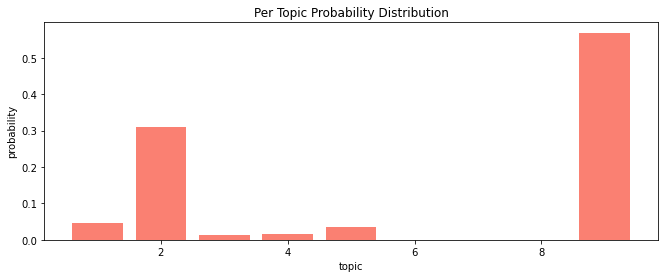

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(11,4)
plt.bar(topic_dist_table['Topic'], topic_dist_table['Probabilities'], align='center', alpha=1, color='salmon')
plt.xlabel('topic')
plt.ylabel('probability')
plt.title('Per Topic Probability Distribution')
plt.show()

### Include the topic proportions $\theta_d$ for each house 


In [23]:
num_topics = 10
theta = pd.DataFrame({"Theta0": np.zeros(ct_homes.shape[0])})
for t in np.arange(1,num_topics):
    theta["Theta"+str(t)] = np.zeros(ct_homes.shape[0])
    
for i in np.arange(ct_homes.shape[0]):
    for t in tm.get_document_topics(corpus[i]):
        theta.loc[i,"Theta"+str(t[0])] = t[1]

In [24]:
ct_topics = ct_homes.join(theta)
ct_topics

,AREA,BED,BATH,BUILT,DESCRIPTION,LOTSIZE,PRICE,logAREA,logLOTSIZE,logPRICE,Theta0,Theta1,Theta2,Theta3,Theta4,Theta5,Theta6,Theta7,Theta8,Theta9
0,1629.0,2.0,2.0,1889.0,"Welcome home! Charming & well kept, this 2 bed...",0.159986,224000.0,7.395722,-1.832669,12.319401,0.000000,0.217733,0.307562,0.013004,0.015983,0.276442,0.000000,0.068734,0.0,0.090220
1,1278.0,3.0,2.0,1900.0,This adorable cape has a lot to offer. You st...,0.179981,225000.0,7.153052,-1.714902,12.323856,0.058219,0.071380,0.402322,0.012686,0.015575,0.241167,0.000000,0.132528,0.0,0.056359
2,1264.0,3.0,2.0,1988.0,This 1264 sqft Colonial with its 3 bedrooms an...,0.089991,224900.0,7.142037,-2.408049,12.323411,0.000000,0.585883,0.156176,0.010631,0.016617,0.139862,0.033774,0.019388,0.0,0.030921
3,2054.0,3.0,3.0,1960.0,The perfect oversized ranch awaits you at 7 No...,0.569994,370000.0,7.627544,-0.562129,12.821258,0.018890,0.024961,0.828650,0.000000,0.010880,0.073783,0.000000,0.000000,0.0,0.030548
4,4198.0,5.0,3.0,1972.0,Beautiful Colonial-3020 sqft. living space and...,0.939989,489999.0,8.342364,-0.061887,13.102159,0.000000,0.066090,0.488583,0.000000,0.036448,0.311833,0.000000,0.000000,0.0,0.076273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,848.0,3.0,2.0,1948.0,This home sets at the beginning of a Cul-de-Sa...,0.189990,429900.0,6.742881,-1.660781,12.971308,0.019154,0.141276,0.446501,0.026240,0.028841,0.262198,0.000000,0.018545,0.0,0.048959
1922,2400.0,4.0,4.0,2021.0,New home to be built. Amazing unobstructed wat...,0.079981,800000.0,7.783224,-2.525960,13.592367,0.025282,0.041325,0.539177,0.015924,0.059542,0.115156,0.075165,0.000000,0.0,0.118586
1923,6538.0,7.0,7.0,2002.0,Can you say water views galore? Wake up to the...,0.079981,2700000.0,8.785387,-2.525960,14.808762,0.000000,0.273469,0.136182,0.102196,0.023975,0.144643,0.098131,0.000000,0.0,0.212532
1924,4480.0,5.0,5.0,1890.0,NEW YEAR! NEW FUTURE! Escape NY to Connect...,0.849998,2550000.0,8.407378,-0.162521,14.751604,0.012756,0.360857,0.187796,0.103611,0.023432,0.108214,0.016014,0.012044,0.0,0.172680


#### Fit a linear model with the topic proportions included

We now fit a linear model with the topic proportions included. Note that 
the proportions satisfy $\theta_0+\theta_1+\cdots + \theta_9 = 1$. Therefore, we remove one of them, since it is redundant. If we don't do this the linear model will be harder to interpret!


In [25]:
model = sm.ols("logPRICE ~ logAREA + logLOTSIZE + BED + BATH + BUILT + Theta0 + " +
               "Theta1 + Theta2 + Theta3 + Theta4 + Theta5 + Theta6 + Theta7 + Theta8", data=ct_topics).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPRICE   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     769.3
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:13:12   Log-Likelihood:                -1036.1
No. Observations:                1926   AIC:                             2102.
Df Residuals:                    1911   BIC:                             2186.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0959      0.529     17.190      0.000       8.058      10.134
logAREA        0.4800      0.033     14.571      0.000       0.415       0.545
logLOTSIZE     0.0496      0.009      5.319      0.000       0.031       0.068
BED           -0.0081      0.013     -0.644      0.519      -0.033       0.017
BATH           0.1460      0.010     14.585      0.000       0.126       0.166
BUILT          0.0008      0.000      3.598      0.000       0.000       0.001
Theta0         1.7751      0.631      2.814      0.005       0.538       3.012
Theta1        -2.4646      0.163    -15.092      0.000      -2.785      -2.144
Theta2        -2.2093      0.140    -15.758      0.000      -2.484      -1.934
Theta3        -1.0790      0.301     -3.579      0.000      -1.670      -0.488
Theta4        -1.9870      0.294     -6.763      0.000      -2.563      -1.411
Theta5        -2.3583      0.149    -15.820      0.000      -2.651      -2.066
Theta6         3.9930      0.465      8.579      0.000       3.080       4.906
Theta7        -1.0803      0.650     -1.662      0.097      -2.355       0.194
Theta8         0.6659      0.513      1.299      0.194      -0.339       1.671
==============================================================================
Omnibus:                      127.152   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              445.901
Skew:                           0.247   Prob(JB):                     1.49e-97
Kurtosis:                       5.305   Cond. No.                     1.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

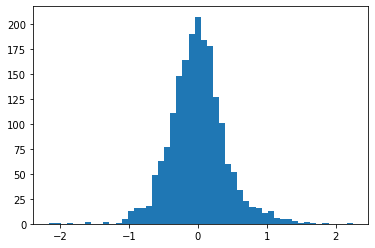

In [26]:
plt.hist(model.resid, bins=50)
plt.show()

### Model without the topics included

In [27]:
model_without_topics = sm.ols("logPRICE ~ logAREA + logLOTSIZE + BED + BATH + BUILT", data=ct_topics).fit()
model_without_topics.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPRICE   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1417.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:13:13   Log-Likelihood:                -1370.4
No. Observations:                1926   AIC:                             2753.
Df Residuals:                    1920   BIC:                             2786.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9172      0.528     11.203      0.000       4.881       6.953
logAREA        0.7285      0.035     20.723      0.000       0.660       0.797
logLOTSIZE     0.0673      0.010      6.481      0.000       0.047       0.088
BED           -0.0620      0.015     -4.214      0.000      -0.091      -0.033
BATH           0.2373      0.011     21.734      0.000       0.216       0.259
BUILT          0.0006      0.000      2.249      0.025    7.19e-05       0.001
==============================================================================
Omnibus:                      271.078   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              863.510
Skew:                           0.705   Prob(JB):                    3.10e-188
Kurtosis:                       5.961   Cond. No.                     9.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3.2 Plot the residuals

On a single plot, show a histogram of the residuals of the model without the topics, 
and the residuals of the model with the topics. Give a legend that shows which is which.
Comment on the results. 


In [28]:
# your code here

#### 3.3 Quantify the improvement: R-squared

How do the two models compare in terms of R-squared? What do these numbers mean?


[your markdown here]

#### 3.4 Quantify the improvement: MSE decrease

What is the percent decrease in the mean-squared-error of the model with the topics
compared to the model that ignores the descriptions?


In [29]:
# [your code and markdown here]

#### 3.5 Quantify the improvement: LOOCV

What is the percent decrease in the leave-one-out-cross-validation (LOOCV) error?
Recall from class that the following formula can be used to calculate this:

<img src="https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn6/loocv.png" width="410" align="center">

<br>

The following line of code computes this for one of the models:

`np.mean((model.resid/(1 - model.get_influence().hat_matrix_diag))**2)`

In [30]:
# your code here 

#### 3.6 Repeat for three topics 

Now, repeat the above steps for a topic model that is trained using only three (3) topics. Specifically:

1. Train a model with three topics
1. Display the top words in each of the three topics
1. Augment the `ct_homes` data with the resulting topic proportions $\theta$
1. Fit a linear model *using only the first two of the three* proportions
1. Plot a histogram of the residuals of the three linear models together
1. Comment on the improvement over the baseline in terms of R-squared, MSE, and LOOCV compared with the previous two models.


In [31]:
# your code and markdown here

#### 3.7 Interpretation

Now, interpret the model. Use the coefficients of the linear model to 
help interpret the meaning of the topics. Comment on what this says 
about the effectiveness of the topic model for predicting the sale price 
of the house. Does it make intuitive sense? Why or why not?


[your markdown here]

### Problem 4: Topic models unite! (20 points)

In this problem we will continue working with topic models, but this time with a new dataset. Instead of real estate listings, we will create topic models over speeches from the United Nations, as described
[here](https://towardsdatascience.com/exploring-the-un-general-debates-with-dynamic-topic-models-72dc0e307696). 
The dataset was [obtained from Kaggle](https://www.kaggle.com/unitednations/un-general-debates/home), an online community of data scientists. 

In [32]:
import numpy as np
import pandas as pd
import re
import gensim
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

The data are in a CSV format in `un-general-debates.csv`. To read it in you can use the 
function `pd.read_csv`.

In [33]:
%%time
un_data = pd.read_csv('https://sds265.s3.amazonaws.com/un-general-debates.csv')
un_data

CPU times: user 2.07 s, sys: 987 ms, total: 3.06 s
Wall time: 50.1 s


,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...
4,44,1989,ZWE,﻿I should like at the outset to express my del...
...,...,...,...,...
7502,56,2001,KAZ,﻿This session\nthat is taking place under extr...
7503,56,2001,LBR,﻿I am honoured to\nparticipate in this histori...
7504,56,2001,BDI,﻿It\nis for me a signal honour to take the flo...
7505,56,2001,HUN,"﻿First, may I congratulate Mr. Han Seung-soo o..."


Your task is to build a topic model of these UN speeches.


#### 4.1 Clean and process the data, and fit a topic model.

You can simply copy over the code from Problem 3, and make appropriate modifications here. This time build 
a topic model with 15 topics. Here are some suggestions that may help.

* You can take just the first (say) 5,000 characters of each speech. Take more or less as you see fit. 
* Construct a vocabulary that has no more than 5,000 tokens, by setting a sufficiently high count cutoff for the minimum number of times a word appears in the corpus.
* The above two items will help the topic model train in a reasonable amount of time and memory.

Here are the helper functions used above, just renamed:

In [34]:
def cleanup_speech(desc):
    if type(desc) == float:
        desc = ""
    words = [re.sub(r'[^a-z]', '', w) for w in desc.lower().split(' ')]
    return ' '.join(words)

def reduce_to_vocabulary(desc, vocab):
    return ' '.join([w for w in cleanup_description(desc).split(' ') if w in vocab])


Using this, for example, we have the first 5,000 characters of the 17th speech:

In [35]:
example = 17
cleanup_speech(un_data['text'][example])[0:5000]

'please accept sir the congratulations of the delectation of the byelorussian soviet socialist republic on your election as president of the fortyfourth session of the united nations general assembly we are most appreciative of the activities of the secretarygeneral and share the view he expressed in the report on the work of the organization thatthe united nations needs to demonstrate its capacity to function as guardian of the worlds security a p the united nations emerged from the second world war which was unleashed by fascism and militarism which took advantage of the lack of unity among peaceloving forces and of the negative response of the european nations to the soviet proposals for collective action against the aggressor our people took up arms to defend the goals and principles of international relations which were later enshrined with our participation in the united nations charter the members of the antihitler coalition were fighting not only for their national interests bu

Now, complete the processing of the data in order to build a 15-topic model, displaying the top words in each topic.

In [36]:
# your code here

#### 4.2 Label the Topics

Label each the 15 topics with a short (4 words or less) description. 

[your markdown here]

#### 4.3 Table of Topics

Create a function `create_speech_table(data, speeches, corpus, lda_model)` which does the following:
- Goes through every speech and finds the most likely topic for that speech.
- Creates a DataFrame `speech_table` that has the following columns
    - `topic`: the topic number of the most likely topic for each abstract
    - `label`: the topic label of that topic number, which you assigned in part 1
    - `prob`: the probability of that topic number
    - `speech`: a string containing the first 200 characters of the speech
- Show the first 10 rows of the table, then return the table

In [37]:
# your code here

#### 4.4 Analysis for selected speeches

Choose at least five speeches and discuss how the assignment of topics either does or does not make sense, according to your own understanding of the speeches and topics.

In [38]:
# your code and markdown here